<a href="https://colab.research.google.com/github/mariron42/FisicaComputacional-1/blob/main/Act7/Act_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
# 4 de marzo de 2021
# Cargamos las bibliotecas para trabajar en Algebra Lineal

import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


# Bibliotecas para el análisis de Series de Tiempo y Modelos de Pronóstico

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.arima_model import ARIMAResults



from statsmodels.tsa.stattools import acf, pacf# Suprimir mensajes de alertas de cambios futuros
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline


**Ejercicio 1.** Defina las siguientes matrices.

\begin{equation*}
 A =
  \begin{bmatrix}
   1 & 3 \\
   -1 & 7
   \end{bmatrix}
\end{equation*}

\begin{equation*}
 B =
  \begin{bmatrix}
   5 & 2 \\
   1 & 2
   \end{bmatrix}
\end{equation*}

 y la matrix identidad 

 \begin{equation*}
 I = 
   \begin{bmatrix}
   1 & 0 \\
   0 & 1
   \end{bmatrix}
\end{equation*}

Calcule el resultado de $2*I+3*A+A@B$.

Para definir la matriz identidad, se puede utilizar la función *np.eye(2, dtype=int)*. Ver manual de  [np.eye()](https://numpy.org/doc/stable/reference/generated/numpy.eye.html).

In [3]:
#difinir matrices 
A=np.array([[1,3],[-1,7]])
B=np.array([[5,2],[1,2]])
I=np.array([[1,0],[0,1]])
#calcular el resultado 
resultado=(2*I)+(3*A)+(A@B)
#imprimir el resultado
print(resultado)

[[13 17]
 [-1 35]]


**Ejercicio 2**. Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación 
\begin{equation}
\det(M - \lambda I) = 0
\end{equation}
Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como
\begin{equation}
P_2 (\lambda) = \det{(M)} - \mathrm{tr}(M) \, \lambda + \lambda^2   
\end{equation}
y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

\begin{equation}
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
\end{equation}

[El Teorema de Cayley-Hamilton](https://en.wikipedia.org/wiki/Cayley–Hamilton_theorem) nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico
\begin{equation}
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
\end{equation}
y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$. 

Demuestre esto para cualquier matriz M (2x2),  ($\det(M) \neq 0$).

In [4]:
# Definir una Matriz con determinante diferente a 0
k = np.array([[8,1],[3,7]])

print(k)
print("Su determinante es ",la.det(k))


[[8 1]
 [3 7]]
Su determinante es  53.0


In [5]:
# Calcular el polinomio característico para M(2x2)

print("det=", la.det(k))

print("tr=",np.trace(k))


print("P_2(M)=")
print(la.det(k)*np.eye(2, dtype=int)-np.trace(k)*k+k@k)

det= 53.0
tr= 15
P_2(M)=
[[0. 0.]
 [0. 0.]]


**Ejercicio 3:**

Resuelva el sistema de ecuaciones.

\begin{eqnarray*}
x - 3 y + z & = & 1 \\ \nonumber
3 x - 4y + z & = & 5 \\ \nonumber
2 y - z & = & 0 \\ \nonumber
\end{eqnarray*}

de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [6]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

Procedimiento largo


In [7]:
#Meter columnas a la izquierda del igual
M = np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
print(M)
print('det(M) = ', la.det(M))

[[ 1 -3  1]
 [ 3 -4  1]
 [ 0  2 -1]]
det(M) =  -1.0000000000000004


In [8]:
# Matriz aumentada: Unimos la matriz M con la matriz Identidad 
A = np.hstack([M,np.eye(3)])
print(A)

[[ 1. -3.  1.  1.  0.  0.]
 [ 3. -4.  1.  0.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [9]:
# "Sumar k veces el renglón j al renglón i en la matriz A."
# Resta 3 veces renglón 1 al 2
A1 = add_row(A,-3,1,0)

print(A1)

[[ 1. -3.  1.  1.  0.  0.]
 [ 0.  5. -2. -3.  1.  0.]
 [ 0.  2. -1.  0.  0.  1.]]


In [10]:
#Resta -2/5 veces renglón 2 al 3
A2 = add_row(A1, -(2/5),2,1)
print(A2)

[[ 1.  -3.   1.   1.   0.   0. ]
 [ 0.   5.  -2.  -3.   1.   0. ]
 [ 0.   0.  -0.2  1.2 -0.4  1. ]]


In [11]:
#sumar 3/5 veces el renglón 2 al 1
A3 = add_row(A2, (3/5),0,1)
print(A3)

[[ 1.00000000e+00 -1.11022302e-16 -2.00000000e-01 -8.00000000e-01
   6.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+00 -2.00000000e+00 -3.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.00000000e-01  1.20000000e+00
  -4.00000000e-01  1.00000000e+00]]


In [12]:
#Dividir el renglón 2 entre 5
A4 = scale_row(A3, (1/5),1)
print(A4)

[[ 1.00000000e+00 -1.11022302e-16 -2.00000000e-01 -8.00000000e-01
   6.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -4.00000000e-01 -6.00000000e-01
   2.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.00000000e-01  1.20000000e+00
  -4.00000000e-01  1.00000000e+00]]


In [13]:
#RESTAR -2 veces el renglón 3 al 2
A5 = add_row(A4, -2,1,2)
print(A5)

[[ 1.00000000e+00 -1.11022302e-16 -2.00000000e-01 -8.00000000e-01
   6.00000000e-01  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.00000000e-01  1.20000000e+00
  -4.00000000e-01  1.00000000e+00]]


In [14]:
#Restar 1 veces el renglón 3 al 1
A6 = add_row(A5, -1,0,2)
print(A6)

[[ 1.00000000e+00 -1.11022302e-16  0.00000000e+00 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.00000000e-01  1.20000000e+00
  -4.00000000e-01  1.00000000e+00]]


In [15]:
#Multiplicar el renglón 3 por -5
A7 = scale_row(A6, -5,2)
print(A7)

[[ 1.00000000e+00 -1.11022302e-16  0.00000000e+00 -2.00000000e+00
   1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16 -3.00000000e+00
   1.00000000e+00 -2.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 -6.00000000e+00
   2.00000000e+00 -5.00000000e+00]]


In [16]:
#Redondear la matris 
A8 = np.round(A7,2)
print(A8)

[[ 1. -0.  0. -2.  1. -1.]
 [ 0.  1. -0. -3.  1. -2.]
 [ 0.  0.  1. -6.  2. -5.]]


In [17]:
# Hemos obtenido la inversa
M_inv = A8[:,3:]
print(M_inv)

[[-2.  1. -1.]
 [-3.  1. -2.]
 [-6.  2. -5.]]


In [18]:
# El producto de M_inv @ M = I 
result = M_inv @ M
print(result)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [19]:
# Checamos la inversa de M con la función 'la.inv(M)'
la.inv(M)

array([[-2.,  1., -1.],
       [-3.,  1., -2.],
       [-6.,  2., -5.]])

In [20]:
#meter columna a la derecha del igual
# definimos b. Recordemos que tenemos que usar la función .reshape()
b = np.array([1,-5,0]).reshape(3,1)
print(b)

[[ 1]
 [-5]
 [ 0]]


In [21]:
# La solución es:
x = M_inv @ b 
print(x)

[[ -7.]
 [ -8.]
 [-16.]]


Metodo corto 


In [22]:
slc= la.solve(M, b)
print(slc)


[[ -7.]
 [ -8.]
 [-16.]]


**Ejercicio 4:** 

Dadas las siguientes matrices $B_1, B_2$ y $B_3$

(Ejemplos del artículo de Wikipedia sobre [Eigenvalores y Eigenvectores](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors#Matrix_examples)) 


\begin{equation*}
B_1 = \begin{bmatrix}
2 & 0 & 0 \\
0 & 3 & 4 \\
0 & 4 & 9 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_2 = \begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0 \\
\end{bmatrix}
\end{equation*}

\begin{equation*}
B_3 = \begin{bmatrix}
2 & 0 & 0 & 0\\
1 & 2 & 0 & 0 \\
0 & 1 & 3 & 0 \\
0 & 0 & 1 & 3 \\
\end{bmatrix}
\end{equation*}

Encuentra los eigenvalores y eigenvectores de cada matriz utilizando la función de *scipy.linalg.eig()*, y contrasta tus resultados en cada caso con los que se desarrollan en los ejemplos de la Wikipedia. 

In [23]:
#Declarar matrises 
B1 = np.array([[2,0,0],[0,3,4],[0,4,9]])
B2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
B3 = np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
#Ver si están bien 
print(B1)
print(" ")
print(B2)
print(" ")
print(B3)
print(" ")

print(B1)
print(" ")



[[2 0 0]
 [0 3 4]
 [0 4 9]]
 
[[0 1 0]
 [0 0 1]
 [1 0 0]]
 
[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]
 
[[2 0 0]
 [0 3 4]
 [0 4 9]]
 


In [24]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals1, eigvecs1 = la.eig(B1)
print('Eigenvalores B1:')
print(eigvals1)
print('Eigenvectores B1:')
print(eigvecs1)

eigvals2, eigvecs2 = la.eig(B1)
print('Eigenvalores B2:')
print(eigvals1)
print('Eigenvectores B2:')
print(eigvecs1)

eigvals3, eigvecs3 = la.eig(B1)
print('Eigenvalores B3:')
print(eigvals3)
print('Eigenvectores B3:')
print(eigvecs3)

Eigenvalores B1:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B1:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
Eigenvalores B2:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B2:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]
Eigenvalores B3:
[11.+0.j  1.+0.j  2.+0.j]
Eigenvectores B3:
[[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]


**Ejercicio 5.**
Se tienen los siguientes 8 puntos: 

\begin{eqnarray*} 
(x&,&y) \\
(0.0 &,& 0.0), \\ 
(0.5 &,& 0.47942), \\ 
(1.0 &,& 0.84147), \\
(1.5 &,& 0.99749), \\
(2.0 &,& 0.90930), \\
(2.5 &,& 0.59847), \\
(3.0 &,& 0.14112), \\
(3.5 &,& -0.35078) \\
\end{eqnarray*}

Encuentre un polinomio interpolante $p(x)$ que pase por los 8 puntos. 

Sobreponga la función $y=\sin(x)$ y contrástela con el polinomio $p(x)$.

**Ejercicio 6.** 
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones. 


matrices
[[ 0.       0.     ]
 [ 0.5      0.47942]
 [ 1.       0.84147]
 [ 1.5      0.99749]
 [ 2.       0.9093 ]
 [ 2.5      0.59847]
 [ 3.       0.14112]
 [ 3.5     -0.35078]]
x
[0.  0.5 1.  1.5 2.  2.5 3.  3.5]
y
[ 0.       0.47942  0.84147  0.99749  0.9093   0.59847  0.14112 -0.35078]


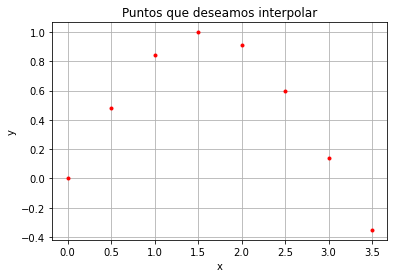

In [25]:
#Declarar matrises 
print("matrices")
p1 = np.array([[0.0,0.0],[0.5,0.47942],[1.0,0.84147],[1.5,0.99749],[2.0,0.90930],[2.5,0.59847],[3.0,0.14112],[3.5,-0.35078]])
print(p1)
#Definirr una lista con x
x=p1[:,0]
print("x")
print(x)
#Definirr una lista con y 
y=p1[:,1]
print("y")
print(y)


plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos que deseamos interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [26]:
# Creamos la matriz de Vandemonde
X = np.vander(x,increasing=True)
#Es rango 8 porque tenenmos 8 puntos 
print(X)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02 7.81250000e-03]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01 1.70859375e+01]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02 6.10351562e+02]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02 2.18700000e+03]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218750e+02 1.83826562e+03 6.43392969e+03]]

In [27]:
# Usar scipy.linalg.solve(), para encontrar los coeficientes
# de la ecuación lineal Xa=y

#y = np.array([[0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]]).reshape(8,1)
a = la.solve(X,y)
print(a)

[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


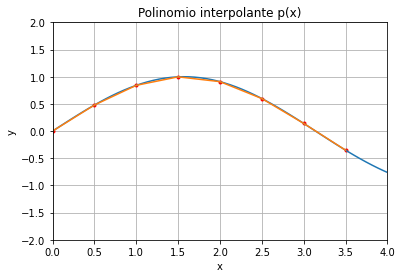

In [31]:

# Graficamos el polinomio interpolante y los puntos interpolados
# Los puntos interpolados en rojo ('r.')
xs = np.linspace(0,7,100) #(0,grado del polinomio, puntos)
ys = sum([a[k]*xs**k for k in range(0,8)])

#Graficación
plt.plot(x,y,'r.',xs,ys,x,np.sin(x))
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,4)
plt.ylim(-2,2)
plt.show()

# **Ejercicio 6**

**Ejercicio 6.** Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

**NOTA:** Pueden trabajar en sus Notebooks de la Actividad 5 o 6 y hacer el ajuste de regresión lineal allá donde tienen todo cargado en la memoria y luego copiar unas celdas de texto de esa Notebook y agregarlas al final de su Notebook de la Actividad 7. Así no tienen que cargar a la memoria todas las operaciones.

In [127]:
url = 'https://raw.githubusercontent.com/mariron42/Los-trabajos-de-marcel/main/act3/2033.txt' # URL de inf raw
  
#Analisasmos a estación de mexicali

#Le damos nombres a las columnas
my_cols = ['Fecha', 'Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)'] 

df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')
#variable= pd.leer_cvs(variable donde está la base datos, lista que le da nomberes a las columnas, encoding=cp1251(español),El separador de datos es de uno o más espacios, sep='\s+'
 # Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado,# Se procesan los datos utilizando Python, engine='python)
df_w1 = df_dist.copy() # Se hace una copia del dataframe

str_Nulo = 'Nulo'
df_w2 = df_w1.replace(to_replace=str_Nulo, value='', regex=True) # Reemplazar Nulo por un espacio en blanco

cols_list = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
for cols in cols_list:
  df_w2[cols] = pd.to_numeric(df_w2[cols], errors='coerce') # Se convierten a números flotantes 
#df_w2.info()

# De la instrucción anterior, vemos que hay valores faltantes. Sumamos los valores nulos. 
df_w2.isnull().sum()

# Un análisis estadístico breve de las variables numéricas redondeado a 2 cifras significativas
df_w2.describe().round(2)

df_w3 = df_w2.copy() # Se hace una copia del dataframe

df_w3['Fecha']=pd.to_datetime(df_w3['Fecha'], dayfirst=True).copy() # Primer dato que sea dia
#df_w3['year'] = df_w3['Fecha'].dt.year # Columna de año
#df_w3['month'] = df_w3['Fecha'].dt.month # Columna de mes
#df_w3['Precip(MM)']=df_w3.index
df_w3['Fecha2']=df_w3['Fecha']
df_w3 = df_w3.set_index('Fecha2') # Verificar tipos
start, end = '1998-01', '2012-10'
df_meteo = df_w3.loc[start:end].copy()

#df_meteo = df_w3.copy() # Archico con que trabajar actividad 4
# df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())
print(df_meteo['Tmax(°C)'].isnull().values.any())
print(df_meteo['Tmin(°C)'].isnull().values.any())

                Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)
Fecha2                                                         
1998-01-01 1998-01-01         0.0       0.8      21.0       8.5
1998-01-02 1998-01-02         0.0       1.4      21.0       7.3
1998-01-03 1998-01-03         0.2       0.8      20.6       7.5
1998-01-04 1998-01-04         0.0       3.4      19.6       9.8
1998-01-05 1998-01-05         0.0       1.4      19.5       8.8
                Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)
Fecha2                                                         
2012-10-27 2012-10-27         0.0       7.6      30.0      14.0
2012-10-28 2012-10-28         0.0       5.0      31.4      12.5
2012-10-29 2012-10-29         0.0       4.1      32.6      13.0
2012-10-30 2012-10-30         0.0       4.2      33.2      13.5
2012-10-31 2012-10-31         0.0       5.4      32.8      14.0
False
False


In [128]:
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [129]:
df_act=df_meteo # Se trabajara con este dataframe
df_act['FechaDecimal']=df_meteo['Tmax(°C)'] # Se crea una columna copiando otra 
del(df_act['Precip(MM)']) # Se elimina
del(df_act['Evap(MM)']) # Se elimina

N=len(df_act) # Longitud del dataframe

for x in range(N): #Repetir por todo el rango del dataframe
  index=x
  df_act['FechaDecimal'].iloc[index]=toYearFraction(df_act['Fecha'].iloc[index]) # Hacer decimal la fecha

del(df_act['Fecha']) # Se elimina
df_act= df_act.astype(float) # Cambiar los tipos

print(df_act.head())
print(df_act.tail())
df_act.dtypes

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


            Tmax(°C)  Tmin(°C)  FechaDecimal
Fecha2                                      
1998-01-01      21.0       8.5   1998.000000
1998-01-02      21.0       7.3   1998.002740
1998-01-03      20.6       7.5   1998.005479
1998-01-04      19.6       9.8   1998.008219
1998-01-05      19.5       8.8   1998.010959
            Tmax(°C)  Tmin(°C)  FechaDecimal
Fecha2                                      
2012-10-27      30.0      14.0   2012.819672
2012-10-28      31.4      12.5   2012.822404
2012-10-29      32.6      13.0   2012.825137
2012-10-30      33.2      13.5   2012.827869
2012-10-31      32.8      14.0   2012.830601


Tmax(°C)        float64
Tmin(°C)        float64
FechaDecimal    float64
dtype: object

In [130]:
#Construimos la matriz de Vandermonde
x=df_act['FechaDecimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (5415, 2)


In [131]:
#Construimos las matrices "y"
ymax=np.array(df_act['Tmax(°C)'])
ymin=np.array(df_act['Tmin(°C)'])

In [132]:
#Usamos la función scipy.linalg.solve() para resolver la ecuación X.T@X@a = X.T@y respecto a 'a'
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[-2.30209045e+02  1.30772408e-01]
Para Tmin
[-1.42172360e+02  7.91231317e-02]


In [135]:
dtmax = amax[0] + amax[1]

dtmin = amin[0] + amin[1]

print("Temperatura maxima aprox", dtmax)
print("Temperatura minima aprox", dtmin)

Temperatura maxima aprox -230.0782727383178
Temperatura minima aprox -142.0932372699992


Entonces en la temperatura maxima 

**a0=-2.30209045e+02**

**a1=1.30772408e-01**

y de la temperatura minima 

**a0=-1.42172360e+02**

**a1=7.91231317e-02**


